In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Appendix

### Importing Datasets

In [2]:
#importing "anime_marlesson_jan20.csv"
anime_data = pd.read_csv("animes_marlesson_jan20.csv")
anime_epdata = pd.read_csv("animes_marlesson_jan20.csv")
print("Number of Columns in anime_data: " + str(len(anime_data.columns)))
print("Number of Observations in anime_data: " + str(len(anime_data)))

#importing "profiles_marlesson_jan20.csv"
users = pd.read_csv("profiles_marlesson_jan20.csv")
print("\nNumber of Columns in users: " + str(len(users.columns)))
print("Number of Observations in users: " + str(len(users)))

Number of Columns in anime_data: 12
Number of Observations in anime_data: 19311

Number of Columns in users: 5
Number of Observations in users: 81727


### Cleaning: anime_epdata

In [3]:
print("Number of Columns in anime_epdata: " + str(len(anime_epdata.columns)))
print("Number of Observations in anime_epdata: " + str(len(anime_epdata)))

#Brief cleaning of dataset, removed links and dropped duplicates
anime_epdata = anime_epdata.drop(columns = ['img_url', 'link', 'synopsis'])
anime_epdata = anime_epdata.drop_duplicates()
print("\nNumber of Columns in anime_epdata: " + str(len(anime_epdata.columns)))
print("Number of Observations in anime_epdata: " + str(len(anime_epdata)))

anime_epdata.head()

Number of Columns in anime_epdata: 12
Number of Observations in anime_epdata: 19311

Number of Columns in anime_epdata: 9
Number of Observations in anime_epdata: 16368


,uid,title,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


#### Removing movies, OVAs, and specials
We want to remove the anime movies and OVAs/specials from the list because they are marked as 1 episode in the dataset. This can skew the analysis because we want to investigate the rating and popularity of TV shows . Many movies with high/low rankings can make it seem like the lower number of episodes result in high/low rankings.

In [4]:
#Removing animes with 1 episode
anime_epdata = anime_epdata[anime_epdata["episodes"] != 1.0]
anime_epdata = anime_epdata.copy()
print("Number of TV animes in anime_epdata: " + str(len(anime_epdata)))

Number of TV animes in anime_epdata: 8555


#### Animes with NaN episodes
Now, we want to remove animes with NaN in number of episodes. After manually checking with MAL, many of these animes seemed to have had an error when compiling the data. For example, one anime was completed at 55 episodes, but the observation in the dataframe had NaN as its number of episodes. 

Taking a sample of the animes with missing episodes to check manually on MAL it was also discovered that many of the anime had between 800-1000 episodes. However, the sample size was too small to make conclusions on number of episodes so we decided to completely remove all anime with NaN episodes.

We also dropped the animes with missing popularity, rank, and scores since they will not help our relationship analysis. 

In [5]:
#dropping animes with NaN in "episodes", "ranked", "popularity", "score"
anime_epdata = anime_epdata.dropna(subset=["episodes", "score", "popularity", "ranked"])
print("Number of TV animes after dropping NaN episodes: " + str(len(anime_epdata)))

Number of TV animes after dropping NaN episodes: 7100


#### Checking for outliers

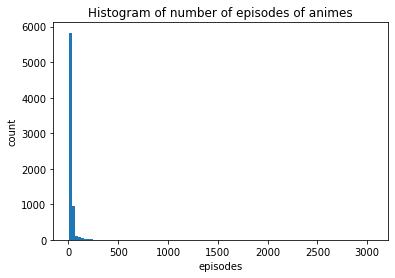

In [6]:
#Create histogram to display possible outliers
plt.hist(anime_epdata["episodes"], bins=100)
plt.title("Histogram of number of episodes of animes")
plt.xlabel('episodes')
plt.ylabel('count')
plt.show()

In [7]:
print("Statistical summary of the outliers (animes with over 500 episodes)")
anime_epdata_over1k = anime_epdata[anime_epdata["episodes"] > 500]
print(round(anime_epdata_over1k.score.describe(),2))

Statistical summary of the outliers (animes with over 500 episodes)
count    15.00
mean      6.14
std       0.61
min       5.00
25%       5.84
50%       6.03
75%       6.32
max       7.74
Name: score, dtype: float64


From the histogram and statistical summary, we see that there's are 15 anime that have over 500 episodes. Since there are so few in the entire sample, we decided to remove it from the dataset. We took away animes that were above the 98th percentile.

In [8]:
#Removing outlier (anime with episodes > 1000)
anime_epdata = anime_epdata[anime_epdata.episodes < np.percentile(anime_epdata.episodes,98)]
print("Number of TV animes in anime_epdata: {}".format(len(anime_epdata)))

Number of TV animes in anime_epdata: 6957


In [20]:
#Description of anime_epdata 
print("Number of columns: " + str(len(anime_epdata.columns)))
print("Column names:") 
for column in anime_epdata.columns: 
    print(column)
print("Number of observations (anime): " + str(len(anime_epdata)))

Number of columns: 9
Column names:
uid
title
genre
aired
episodes
members
popularity
ranked
score
Number of observations (anime): 6957


### Cleaning: anime_data

In [10]:
#Cleaning dataset columns
anime_data = anime_data.drop(columns = ['img_url', 'link', 'synopsis'])
anime_data = anime_data.rename(columns = {'score':'rating'}) 
print("Number of Columns After Cleaning Data: " + str(len(anime_data.columns)))
print("Number of Observations After Cleaning Data: " + str(len(anime_data)))
anime_data.head()

Number of Columns After Cleaning Data: 9
Number of Observations After Cleaning Data: 19311


,uid,title,genre,aired,episodes,members,popularity,ranked,rating
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


#### Creating "aired_year" column

In the dataframe, there is a column named "aired" that gives the air dates of the anime in one of the following formats: 
- month, year 
- year 
- year to year (ex: 20xx to 20xx) 
- NaN 

For the data analyses that we will be doing, we only need the year that the anime aired. Thus, we created a new column that extracts the air year from the "aired" column, dropping anime that were missing "aired."

In [11]:
# Adding a new column to represent the aired year 
# Cases: month, year ; Not available ; just 1 year ; 20xx to 20xx 
aired_years = [] 
for dates in anime_data['aired']: 
    if dates == "Not available":
        aired_years.append(np.nan)
    elif len(dates) > 4 and dates[0].isalpha():
        start = dates.index(",") + 2 
        year = dates[start:start+4] #gets the first year  
        aired_years.append(int(year))
    else:
        aired_years.append(dates[0:3])
anime_data['aired_year'] = aired_years
#anime_data = anime_data.dropna()
print("Below are the first 5 rows of the dataset with the new column 'aired_year' ")
anime_data.head()

Below are the first 5 rows of the dataset with the new column 'aired_year' 


,uid,title,genre,aired,episodes,members,popularity,ranked,rating,aired_year
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,2015
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,2014
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,2017
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,2009
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,2017


In [12]:
print("Number of columns: " + str(len(anime_data.columns)))
print("Column names:") 
for column in anime_data.columns: 
    print(column)
print("Number of observations (anime): " + str(len(anime_data)))

Number of columns: 10
Column names:
uid
title
genre
aired
episodes
members
popularity
ranked
rating
aired_year
Number of observations (anime): 19311


## anime_data and anime_ep data description

Observations: an anime series

Attributes: 
- uid: identifier for each anime set by MAL.
- title: title of the anime series in Japanese/English as set by MAL.
- synopsis: summary of the anime plot.
- genre: genre categories the anime falls in (multiple).
- aired: the start and end date of airing of the anime. "?" end dates means it is ongoing.
- episodes: number of episodes of the anime.
- members: number of members who've added the anime to their list: All Anime, Currently Watching, Completed, On Hold, Dropped, or Plan to Watch. The higher the number of members, the higher the popularity (lower numerical value). 
- popularity: 1-max number of animes ranking system based on the number of members that have it on its list in comparison to the other animes on MAL.
- rating: aggregate rating from 0.00 to 10.00 by the MAL community.
- ranked: 1-max number of animes ranking system based on its rating to the other animes on MAL.
- aired_year: the year of its start aired date.

**anime_epdata** has the same column attributes as anime_data, without aired_year. It has less observations because animes with missing episodes were removed.

### Cleaning: users

In [13]:
print("Number of columns: " + str(len(users.columns)))
print("Column names:")
for column in users.columns:
    print(column)
print("Number of observations (users): " + str(len(users)))

Number of columns: 5
Column names:
profile
gender
birthday
favorites_anime
link
Number of observations (users): 81727


In [14]:
users = users.dropna()
users = users.rename(columns = {'favorites_anime':'favorites'}) 
print("Number of Columns After Cleaning Data: " + str(len(users.columns)))
print("Number of Observations After Cleaning Data: " + str(len(users)))

Number of Columns After Cleaning Data: 5
Number of Observations After Cleaning Data: 43636


In [15]:
birth_years = []
for birthday in users['birthday']: #str 
    if "," in birthday:
        comma_index = birthday.index(',') 
        year = birthday[comma_index + 2:]
        birth_years.append(year)
    else: 
        birth_years.append(np.nan)
users['birth_year']  = birth_years

#dropping users without a birth year
users = users.dropna()
print("Number of users after dropping users without birth year: " + str(len(users)))
users = users.drop(columns = ['birthday'])

#resetting the index 
users = users.reset_index(drop = True)
users.head()

Number of users after dropping users without birth year: 34550


,profile,gender,favorites,link,birth_year
0,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche,1994
1,baekbeans,Female,"['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans,2000
2,aManOfCulture99,Male,"['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99,1999
3,NIGGER_BONER,Male,"['11061', '30', '6594', '28701', '10087', '674...",https://myanimelist.net/profile/NIGGER_BONER,1985
4,jchang,Male,"['846', '2904', '5114', '2924', '72']",https://myanimelist.net/profile/jchang,1992


Observations: singular MAL user (public profile)

Attributes: 
- profile: username of MAL user (set by the user)
- gender: gender (male, female, non-binary) of the MAL user (set by the user) 
- favorites: List of animes the user put into their Anime List - favorites
- birth_year: birth year of the user (set by the user)

### Exporting cleaned datasets as csv:

In [19]:
users.to_csv("/Users/tianh/Documents/users.csv")
anime_data.to_csv("/Users/tianh/Documents/anime_data.csv")
anime_epdata.to_csv("/Users/tianh/Documents/anime_epdata.csv")